In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [5]:
# Load the dataset
data = pd.read_csv("diabetic_data.csv")


# Display the first few rows
print(data.head())

# Step 1: Handle missing values by replacing '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Step 2: Convert columns to appropriate data types if necessary
data['weight'] = data['weight'].astype(float, errors='ignore')

# Step 3: One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Check the unique values in the 'readmitted' column before defining the target variable
if 'readmitted' in data.columns:
    print("Unique values in 'readmitted' column:", data['readmitted'].unique())

# Define target variable and features
X = data.drop(columns=['readmitted_NO', 'readmitted_>30'])  # Adjust according to your encoding
y = data[['readmitted_NO', 'readmitted_>30']].idxmax(axis=1)  # Binary classification

# Map target variable to 0 and 1
y = y.map({'readmitted_NO': 0, 'readmitted_>30': 1})

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6652255084995579
              precision    recall  f1-score   support

           0       0.67      0.94      0.78     13237
           1       0.58      0.16      0.25      7117

    accuracy                           0.67     20354
   macro avg       0.63      0.55      0.52     20354
weighted avg       0.64      0.67      0.60     20354



In [8]:
# Get prediction probabilities
y_prob = model.predict_proba(X_test)

# Create a DataFrame for probabilities
prob_df = pd.DataFrame(y_prob, columns=['Not Readmitted', 'Readmitted'])
print(prob_df.head())

   Not Readmitted  Readmitted
0            0.84        0.16
1            0.75        0.25
2            0.63        0.37
3            0.39        0.61
4            0.63        0.37


In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, gb_y_pred))
print(classification_report(y_test, gb_y_pred))

Gradient Boosting Model Accuracy: 0.6683207231993711
              precision    recall  f1-score   support

           0       0.68      0.91      0.78     13237
           1       0.57      0.21      0.31      7117

    accuracy                           0.67     20354
   macro avg       0.63      0.56      0.54     20354
weighted avg       0.64      0.67      0.62     20354



In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base model
base_model = DecisionTreeClassifier(max_depth=1)  # Using a decision stump

# Initialize and train the AdaBoost model
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
ada_y_pred = ada_model.predict(X_test)

# Evaluate the model
print("AdaBoost Model Accuracy:", accuracy_score(y_test, ada_y_pred))
print(classification_report(y_test, ada_y_pred))

AdaBoost Model Accuracy: 0.6634568143853788
              precision    recall  f1-score   support

           0       0.69      0.89      0.78     13237
           1       0.54      0.24      0.33      7117

    accuracy                           0.66     20354
   macro avg       0.61      0.56      0.55     20354
weighted avg       0.64      0.66      0.62     20354



In [15]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize the individual models
base_model = DecisionTreeClassifier(max_depth=1)  # Using a decision stump
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Create a Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('ada', ada_model)],
    voting='soft')  # Use 'hard' for majority voting

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Predictions
voting_y_pred = voting_model.predict(X_test)

# Evaluate the model
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_y_pred))
print(classification_report(y_test, voting_y_pred))

Voting Classifier Accuracy: 0.6681242016311291
              precision    recall  f1-score   support

           0       0.68      0.93      0.78     13237
           1       0.58      0.18      0.27      7117

    accuracy                           0.67     20354
   macro avg       0.63      0.56      0.53     20354
weighted avg       0.64      0.67      0.61     20354



In [16]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a synthetic dataset (if not already available)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model for AdaBoost
base_model = DecisionTreeClassifier(max_depth=1)

# Initialize the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42))
]

# Create a Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Predictions
stacking_y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_y_pred))
print(classification_report(y_test, stacking_y_pred))

Stacking Classifier Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [20]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Example dataset (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model.fit(X_train, y_train)

# AdaBoost Model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(X_train, y_train)

# Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=500)),
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier())], voting='soft')
voting_model.fit(X_train, y_train)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=500)),
    ('dt', DecisionTreeClassifier()),
    ('ada', AdaBoostClassifier())],
    final_estimator=LogisticRegression(max_iter=500))
stacking_model.fit(X_train, y_train)

# Function to calculate uncertainty (standard deviation across predictions)
def calculate_uncertainty(probs):
    return np.std(probs, axis=0)

# 1. Uncertainty for Gradient Boosting (using multiple models)
gb_probs = [gb_model.predict_proba(X_test)[:, 1] for _ in range(10)]
gb_uncertainty = calculate_uncertainty(gb_probs)

# 2. Uncertainty for AdaBoost (variance across estimators)
ada_probs = np.array([est.predict_proba(X_test)[:, 1] for est in ada_model.estimators_ if hasattr(est, "predict_proba")])
ada_uncertainty = calculate_uncertainty(ada_probs)

# 3. Uncertainty for Voting Classifier
voting_probs = np.array([model.predict_proba(X_test)[:, 1] for model in voting_model.estimators if hasattr(model, "predict_proba")])
voting_uncertainty = calculate_uncertainty(voting_probs)

# 4. Uncertainty for Stacking Classifier (using final predictions)
stacking_probs = stacking_model.predict_proba(X_test)[:, 1]
stacking_uncertainty = np.std(stacking_probs)  # Single standard deviation as final prediction uncertainty

# Display the mean uncertainty for each model
print("Gradient Boosting Uncertainty (Mean):", np.mean(gb_uncertainty))
print("AdaBoost Uncertainty (Mean):", np.mean(ada_uncertainty))
print("Voting Classifier Uncertainty (Mean):", np.mean(voting_uncertainty))
print("Stacking Classifier Uncertainty (Mean):", stacking_uncertainty)

Gradient Boosting Uncertainty (Mean): 4.186755109270024e-17
AdaBoost Uncertainty (Mean): 0.09424664242203612
Voting Classifier Uncertainty (Mean): nan
Stacking Classifier Uncertainty (Mean): 0.387540250786413


Length of importances: 20
Length of feature names: 20


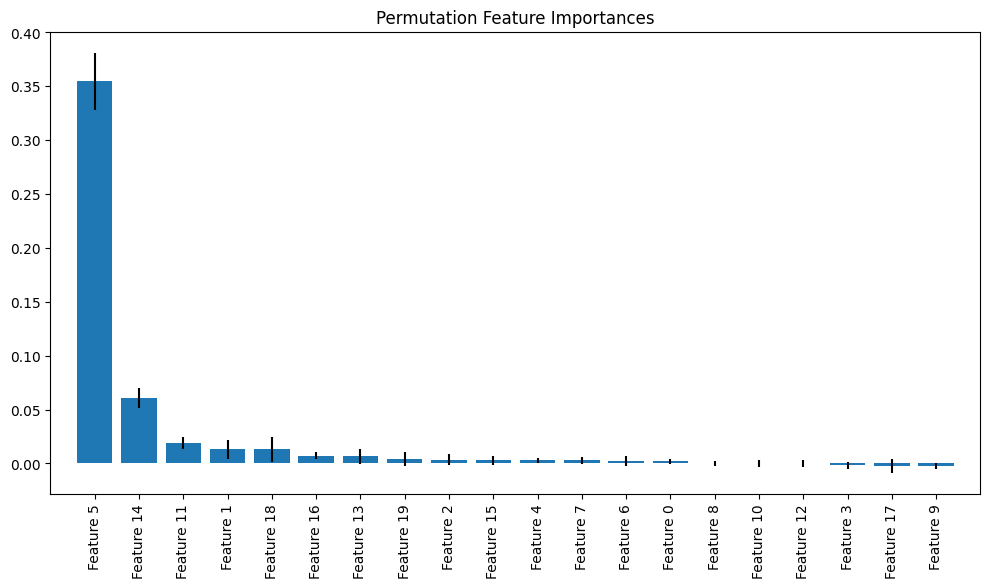

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Fit your model first (if not already done)
model.fit(X_train, y_train)  # Make sure to fit the model to your training data

# Compute permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importances and feature names
importances = result.importances_mean
std = result.importances_std

# Ensure you have the same number of importances as features
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
print(f"Length of importances: {len(importances)}")
print(f"Length of feature names: {len(feature_names)}")

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.title("Permutation Feature Importances")
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()



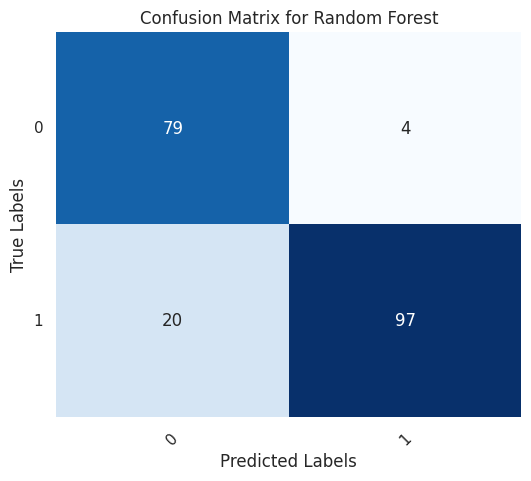

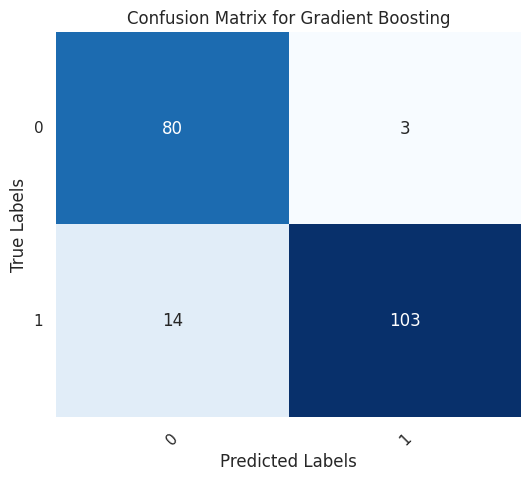

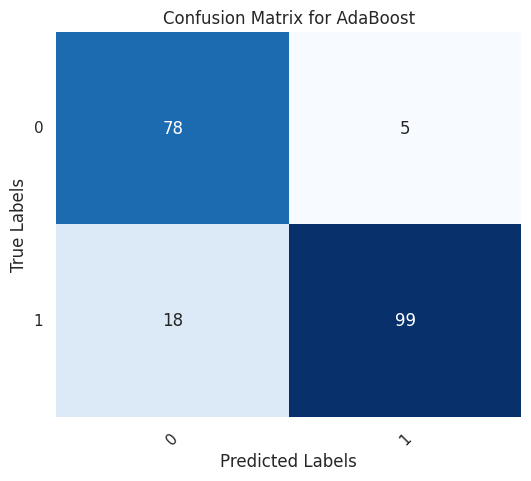

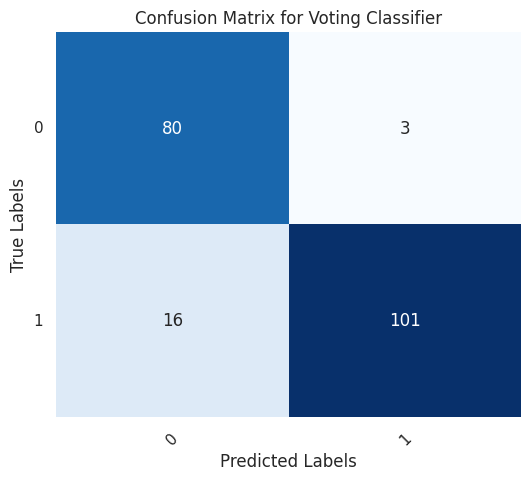

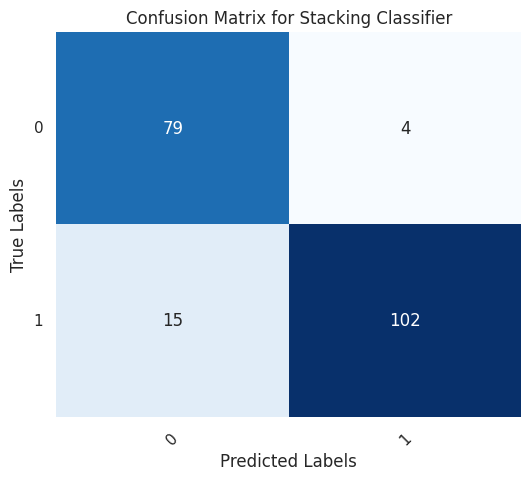

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assume X and y are defined from your dataset
# X = ... (features)
# y = ... (target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train your models
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)

voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('ada', ada_model)],
    voting='soft')
voting_model.fit(X_train, y_train)
voting_y_pred = voting_model.predict(X_test)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('ada', ada_model)],
    final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
stacking_y_pred = stacking_model.predict(X_test)

# Confusion matrix plotting function
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Plot confusion matrix for each model
model_names = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'Voting Classifier', 'Stacking Classifier']
predictions = [rf_y_pred, gb_y_pred, ada_y_pred, voting_y_pred, stacking_y_pred]

for model_name, y_pred in zip(model_names, predictions):
    plot_confusion_matrix(y_test, y_pred, model_name)

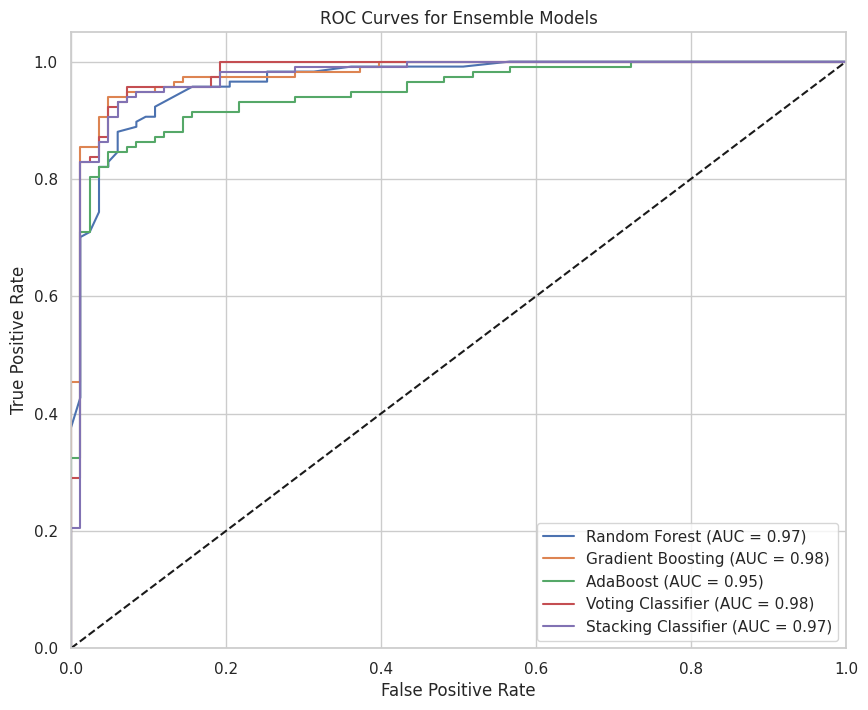

In [32]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
plt.figure(figsize=(10, 8))
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'Voting Classifier': voting_model,
    'Stacking Classifier': stacking_model
}

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Ensemble Models')
plt.legend(loc="lower right")
plt.show()

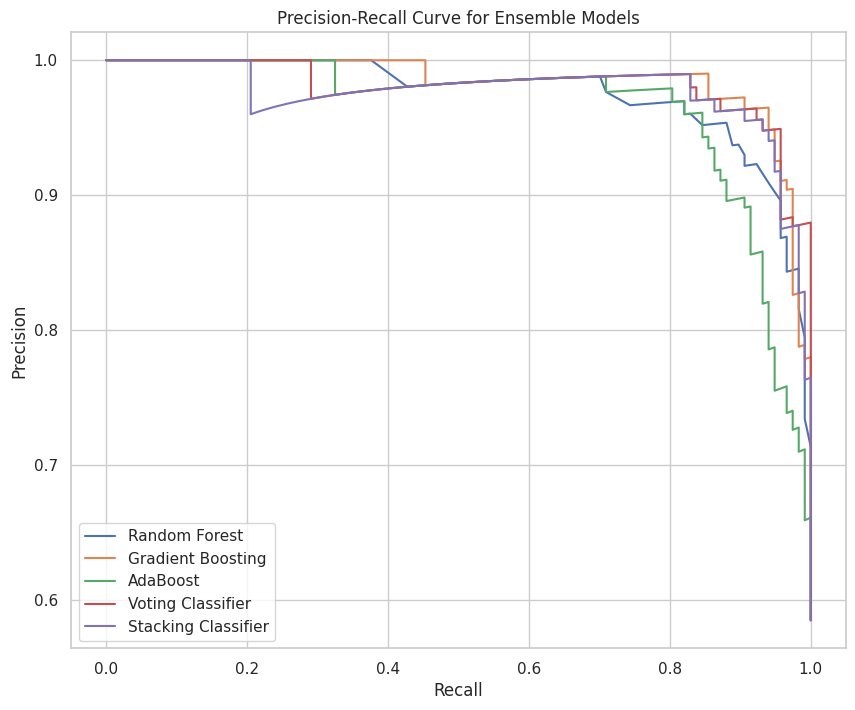

In [33]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Ensemble Models')
plt.legend(loc="best")
plt.show()

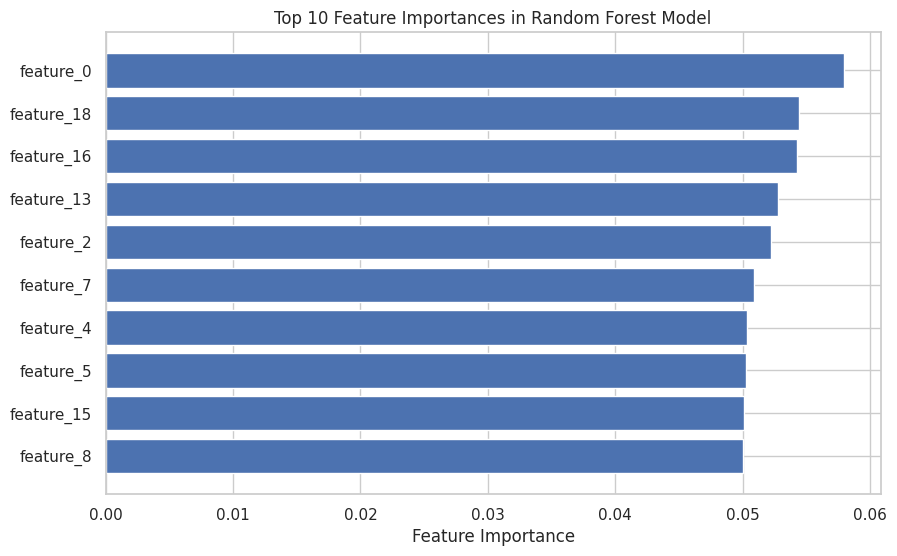

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Load your dataset as a pandas DataFrame
# Replace the following line with your actual data loading mechanism
# For example, using pd.read_csv for a CSV file
# df = pd.read_csv('your_data.csv')
# Assuming 'target' is the name of your target variable
# X = df.drop(columns=['target'])
# y = df['target']

# Create sample data for demonstration (remove this in your actual code)
X = pd.DataFrame(np.random.rand(1000, 20), columns=[f'feature_{i}' for i in range(20)])  # Example feature names
y = np.random.randint(0, 2, size=1000)  # Example binary target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = X.columns  # Ensure X is a DataFrame
indices = np.argsort(importances)[-10:]  # Top 10 features

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.show()


Feature Importance Visualization (For Tree-Based Models) Feature importance visualization helps you understand which features contribute the most to the predictions.

Confusion Matrix: Shows classification accuracy by class. ROC Curve: Evaluates models on the true vs. false positive rate. Precision-Recall Curve: Highlights precision-recall tradeoff. Feature Importance: Reveals which features contribute the most to the model.